In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
#import merged dataset
merged = pd.read_csv(r'C:\Users\brthompson\bt_school\data\interim\merged.csv')

In [3]:
#Investigate data types
merged.dtypes

SUBJECT_ID                int64
GENDER                   object
DOB                      object
DOD                      object
DOD_HOSP                 object
DOD_SSN                  object
EXPIRE_FLAG               int64
VALUE                   float64
HADM_ID                   int64
ADMITTIME                object
DISCHTIME                object
DEATHTIME                object
ADMISSION_TYPE           object
ADMISSION_LOCATION       object
DISCHARGE_LOCATION       object
INSURANCE                object
LANGUAGE                 object
RELIGION                 object
MARITAL_STATUS           object
ETHNICITY                object
EDREGTIME                object
EDOUTTIME                object
DIAGNOSIS                object
HOSPITAL_EXPIRE_FLAG      int64
HAS_CHARTEVENTS_DATA      int64
dtype: object

In [4]:
#Dates have been imported as objects. Convert necessary date fields to the appropriate datatype
merged['admitdate'] = pd.to_datetime(merged['ADMITTIME'], format='%Y-%m-%d')
merged['dischdate'] = pd.to_datetime(merged['DISCHTIME'], format='%Y-%m-%d')
merged['dobdate'] = pd.to_datetime(merged['DOB'], format='%Y-%m-%d')
merged.dtypes

SUBJECT_ID                       int64
GENDER                          object
DOB                             object
DOD                             object
DOD_HOSP                        object
DOD_SSN                         object
EXPIRE_FLAG                      int64
VALUE                          float64
HADM_ID                          int64
ADMITTIME                       object
DISCHTIME                       object
DEATHTIME                       object
ADMISSION_TYPE                  object
ADMISSION_LOCATION              object
DISCHARGE_LOCATION              object
INSURANCE                       object
LANGUAGE                        object
RELIGION                        object
MARITAL_STATUS                  object
ETHNICITY                       object
EDREGTIME                       object
EDOUTTIME                       object
DIAGNOSIS                       object
HOSPITAL_EXPIRE_FLAG             int64
HAS_CHARTEVENTS_DATA             int64
admitdate               d

In [5]:
#Create 2 new variables - age in years and length of stay in days - by subtracting dates
merged['age']=(merged['admitdate'].dt.date - merged['dobdate'].dt.date)
merged['age'] = merged['age'].astype('timedelta64[D]').dt.days
merged['age'] = merged['age']/365

In [6]:
merged['los'] = (merged['dischdate'].dt.date - merged['admitdate'].dt.date)
merged['los'] = merged['los'].dt.days

In [7]:
#Create another variable that divides the VALUE field (total number of visitors a patient received) by the total number of days
merged['visitbyday'] = merged['VALUE']/merged['los']

In [8]:
#Create an additional variable that flags whether there was a readmission - if the patient has another subsequent record. 
#This is the second classifier of interest
merged = merged.sort_values(['SUBJECT_ID', 'admitdate'])
merged['readmit'] = np.where(merged['SUBJECT_ID'].shift(-1)==merged['SUBJECT_ID'], 1, 0)
merged['readmit'].value_counts()

0    46520
1    33673
Name: readmit, dtype: int64

In [9]:
merged.dtypes

SUBJECT_ID                       int64
GENDER                          object
DOB                             object
DOD                             object
DOD_HOSP                        object
DOD_SSN                         object
EXPIRE_FLAG                      int64
VALUE                          float64
HADM_ID                          int64
ADMITTIME                       object
DISCHTIME                       object
DEATHTIME                       object
ADMISSION_TYPE                  object
ADMISSION_LOCATION              object
DISCHARGE_LOCATION              object
INSURANCE                       object
LANGUAGE                        object
RELIGION                        object
MARITAL_STATUS                  object
ETHNICITY                       object
EDREGTIME                       object
EDOUTTIME                       object
DIAGNOSIS                       object
HOSPITAL_EXPIRE_FLAG             int64
HAS_CHARTEVENTS_DATA             int64
admitdate               d

In [10]:
#Remove anyone with a LOS < 1 day since that will result in infinite visits per day
#Change name of dataframe in case need to go back to version with all records and columns
#Keep track of changes using the shape function
merged.shape

(80193, 32)

In [11]:
refined = merged[merged['los']!=0]
refined.shape

(78966, 32)

In [12]:
refined.head(100)

,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,VALUE,HADM_ID,ADMITTIME,...,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,admitdate,dischdate,dobdate,age,los,visitbyday,readmit
452,2,M,2138-07-17 00:00:00,NaN,NaN,NaN,0,NaN,163353,2138-07-17 19:04:00,...,NEWBORN,0,1,2138-07-17 19:04:00,2138-07-21 15:48:00,2138-07-17,0.000000,4,NaN,0
453,3,M,2025-04-11 00:00:00,2102-06-14 00:00:00,NaN,2102-06-14 00:00:00,1,37.0,145834,2101-10-20 19:08:00,...,HYPOTENSION,0,1,2101-10-20 19:08:00,2101-10-31 13:58:00,2025-04-11,76.575342,11,3.363636,0
454,4,F,2143-05-12 00:00:00,NaN,NaN,NaN,0,4.0,185777,2191-03-16 00:28:00,...,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,2191-03-16 00:28:00,2191-03-23 18:41:00,2143-05-12,47.876712,7,0.571429,0
455,5,M,2103-02-02 00:00:00,NaN,NaN,NaN,0,NaN,178980,2103-02-02 04:31:00,...,NEWBORN,0,1,2103-02-02 04:31:00,2103-02-04 12:15:00,2103-02-02,0.000000,2,NaN,0
456,6,F,2109-06-21 00:00:00,NaN,NaN,NaN,0,39.0,107064,2175-05-30 07:15:00,...,CHRONIC RENAL FAILURE/SDA,0,1,2175-05-30 07:15:00,2175-06-15 16:00:00,2109-06-21,65.983562,16,2.437500,0
457,7,F,2121-05-23 00:00:00,NaN,NaN,NaN,0,NaN,118037,2121-05-23 15:05:00,...,NEWBORN,0,1,2121-05-23 15:05:00,2121-05-27 11:57:00,2121-05-23,0.000000,4,NaN,0
458,8,M,2117-11-20 00:00:00,NaN,NaN,NaN,0,NaN,159514,2117-11-20 10:22:00,...,NEWBORN,0,1,2117-11-20 10:22:00,2117-11-24 14:20:00,2117-11-20,0.000000,4,NaN,0
459,9,M,2108-01-26 00:00:00,2149-11-14 00:00:00,2149-11-14 00:00:00,2149-11-14 00:00:00,1,40.0,150750,2149-11-09 13:06:00,...,HEMORRHAGIC CVA,1,1,2149-11-09 13:06:00,2149-11-14 10:15:00,2108-01-26,41.816438,5,8.000000,0
460,10,F,2103-06-28 00:00:00,NaN,NaN,NaN,0,NaN,184167,2103-06-28 11:36:00,...,NEWBORN,0,1,2103-06-28 11:36:00,2103-07-06 12:10:00,2103-06-28,0.000000,8,NaN,0
461,11,F,2128-02-22 00:00:00,2178-11-14 00:00:00,NaN,2178-11-14 00:00:00,1,10.0,194540,2178-04-16 06:18:00,...,BRAIN MASS,0,1,2178-04-16 06:18:00,2178-05-11 19:00:00,2128-02-22,50.180822,25,0.400000,0


In [13]:
#Remove any records that do not have chart events data since they will not have information on visitors
refined = refined[refined['HAS_CHARTEVENTS_DATA']==1]
refined.shape

(76952, 32)

In [14]:
#Remove any records with age<0
refined = refined[refined['age']>=0]

In [15]:
#Examine the VALUE and visitperday attributes to look for outliers
refined['VALUE'].max()

1309.0

In [16]:
refined['VALUE'].hist()

In [17]:
refined['VALUE'].mean()

28.20255816517808

In [18]:
refined['VALUE'].std()

49.14900330544426

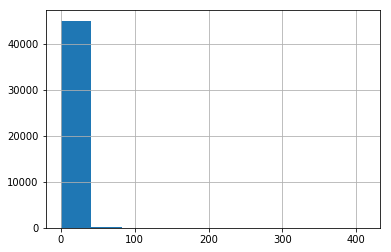

In [19]:
refined['visitbyday'].hist()

In [20]:
refined['visitbyday'].mean()

3.5598967220915902

In [21]:
refined['visitbyday'].std()

9.162135507501349

In [22]:
#Outliers those with more than 50 visits per day. Ensure that there is not a large difference for outliers with 
#respect to classifier variables (e.g. not all outliers passed away or were readmitted)

visit_outliers = refined[refined['visitbyday']>50]

In [23]:
visit_outliers.shape

(209, 32)

In [24]:
visit_outliers['HOSPITAL_EXPIRE_FLAG'].value_counts()

0    167
1     42
Name: HOSPITAL_EXPIRE_FLAG, dtype: int64

In [25]:
refined['HOSPITAL_EXPIRE_FLAG'].value_counts()

0    67186
1     6320
Name: HOSPITAL_EXPIRE_FLAG, dtype: int64

In [26]:
visit_outliers['readmit'].value_counts()

1    164
0     45
Name: readmit, dtype: int64

In [27]:
refined['readmit'].value_counts()

0    43262
1    30244
Name: readmit, dtype: int64

In [28]:
#More readmits and deaths among outliers - keep outliers as this may be an important predictor

In [29]:
#Group all numeric variables into categories - quintiles

In [30]:
refined['VALUE'].isna().sum()

28161

In [31]:
#Replace all NA's in VALUE column with 0's
#Since this is a derived variable that counted the number of entries, if there weren't any entries NA would be assigned 
#but actually represents no visitors
refined['VALUE'] = np.where(refined['VALUE'].isna(), '0', refined['VALUE'])

In [32]:
refined['VALUE'].value_counts()

0        28161
5.0       2441
6.0       2368
4.0       2127
7.0       2094
8.0       2035
9.0       1904
3.0       1740
2.0       1645
10.0      1593
11.0      1554
12.0      1513
1.0       1314
13.0      1227
14.0      1147
17.0      1142
16.0      1043
15.0      1015
18.0       883
19.0       811
20.0       740
21.0       667
22.0       631
23.0       547
24.0       477
29.0       473
26.0       453
27.0       434
28.0       421
25.0       412
         ...  
297.0        1
529.0        1
336.0        1
410.0        1
470.0        1
330.0        1
313.0        1
307.0        1
266.0        1
435.0        1
456.0        1
338.0        1
361.0        1
341.0        1
325.0        1
649.0        1
425.0        1
346.0        1
282.0        1
552.0        1
444.0        1
289.0        1
302.0        1
359.0        1
497.0        1
422.0        1
460.0        1
219.0        1
283.0        1
281.0        1
Name: VALUE, Length: 373, dtype: int64

In [33]:
#Repeat NA replacement for visitbyday
refined['visitbyday'] = np.where(refined['visitbyday'].isna(), '0', refined['visitbyday'])

In [34]:
refined['visitbyday'].value_counts()

0                     28161
1.0                    1858
2.0                    1469
3.0                    1135
0.5                     885
1.5                     849
4.0                     749
2.5                     629
0.6666666666666666      597
1.6666666666666667      575
1.3333333333333333      570
0.3333333333333333      534
5.0                     500
2.6666666666666665      440
1.25                    435
0.75                    420
3.5                     406
6.0                     387
2.3333333333333335      381
1.4                     373
0.25                    359
1.75                    357
1.2                     335
0.8                     326
4.5                     324
0.4                     315
0.6                     312
1.8                     275
1.6                     270
3.3333333333333335      262
                      ...  
11.5625                   1
3.9473684210526314        1
3.6857142857142855        1
7.708333333333333         1
2.6551724137931036  

In [35]:
##EXAMINE ALL CATEGORICAL VARIABLES
#For all categorical variables, any category with n<25 will be grouped under "Other" to reduce dimensionality
#create a function that will compile categories with less than x entries into "Other"
def reducedim(var, df=refined, x=25):
    v=df[var].value_counts()
    print(v)
    vf = v[v<x]
    vi = vf.index.to_list()
    print(len(df[df[var].isin(vi)]))
    df[var] = np.where(df[var].isin(vi), 'Other', df[var])
    print(df[var].value_counts())


In [36]:
refined['ADMISSION_TYPE'].value_counts()

EMERGENCY    55999
ELECTIVE      8288
NEWBORN       7590
URGENT        1629
Name: ADMISSION_TYPE, dtype: int64

In [37]:

refined['ADMISSION_LOCATION'].value_counts()

EMERGENCY ROOM ADMIT         33985
PHYS REFERRAL/NORMAL DELI    16049
CLINIC REFERRAL/PREMATURE    12429
TRANSFER FROM HOSP/EXTRAM    10293
TRANSFER FROM SKILLED NUR      342
** INFO NOT AVAILABLE **       197
TRANSFER FROM OTHER HEALT      124
HMO REFERRAL/SICK               82
TRSF WITHIN THIS FACILITY        5
Name: ADMISSION_LOCATION, dtype: int64

In [38]:
refined['GENDER'].value_counts()

M    40678
F    32828
Name: GENDER, dtype: int64

In [39]:
reducedim(var='ADMISSION_LOCATION', df=refined, x=25)

EMERGENCY ROOM ADMIT         33985
PHYS REFERRAL/NORMAL DELI    16049
CLINIC REFERRAL/PREMATURE    12429
TRANSFER FROM HOSP/EXTRAM    10293
TRANSFER FROM SKILLED NUR      342
** INFO NOT AVAILABLE **       197
TRANSFER FROM OTHER HEALT      124
HMO REFERRAL/SICK               82
TRSF WITHIN THIS FACILITY        5
Name: ADMISSION_LOCATION, dtype: int64
5
EMERGENCY ROOM ADMIT         33985
PHYS REFERRAL/NORMAL DELI    16049
CLINIC REFERRAL/PREMATURE    12429
TRANSFER FROM HOSP/EXTRAM    10293
TRANSFER FROM SKILLED NUR      342
** INFO NOT AVAILABLE **       197
TRANSFER FROM OTHER HEALT      124
HMO REFERRAL/SICK               82
Other                            5
Name: ADMISSION_LOCATION, dtype: int64


In [40]:
refined['DISCHARGE_LOCATION'].value_counts()

HOME                         22483
HOME HEALTH CARE             18694
REHAB/DISTINCT PART HOSP      9761
SNF                           9138
DEAD/EXPIRED                  6320
LONG TERM CARE HOSPITAL       2852
SHORT TERM HOSPITAL           1430
DISC-TRAN CANCER/CHLDRN H      794
LEFT AGAINST MEDICAL ADVI      683
HOSPICE-HOME                   467
DISCH-TRAN TO PSYCH HOSP       456
HOSPICE-MEDICAL FACILITY       162
HOME WITH HOME IV PROVIDR      142
OTHER FACILITY                  61
ICF                             49
DISC-TRAN TO FEDERAL HC         13
SNF-MEDICAID ONLY CERTIF         1
Name: DISCHARGE_LOCATION, dtype: int64

In [41]:
reducedim(var='DISCHARGE_LOCATION')

HOME                         22483
HOME HEALTH CARE             18694
REHAB/DISTINCT PART HOSP      9761
SNF                           9138
DEAD/EXPIRED                  6320
LONG TERM CARE HOSPITAL       2852
SHORT TERM HOSPITAL           1430
DISC-TRAN CANCER/CHLDRN H      794
LEFT AGAINST MEDICAL ADVI      683
HOSPICE-HOME                   467
DISCH-TRAN TO PSYCH HOSP       456
HOSPICE-MEDICAL FACILITY       162
HOME WITH HOME IV PROVIDR      142
OTHER FACILITY                  61
ICF                             49
DISC-TRAN TO FEDERAL HC         13
SNF-MEDICAID ONLY CERTIF         1
Name: DISCHARGE_LOCATION, dtype: int64
14
HOME                         22483
HOME HEALTH CARE             18694
REHAB/DISTINCT PART HOSP      9761
SNF                           9138
DEAD/EXPIRED                  6320
LONG TERM CARE HOSPITAL       2852
SHORT TERM HOSPITAL           1430
DISC-TRAN CANCER/CHLDRN H      794
LEFT AGAINST MEDICAL ADVI      683
HOSPICE-HOME                   467
DISCH-TRAN TO

In [42]:
refined['INSURANCE'].value_counts()

Medicare      36715
Private       26148
Medicaid       8126
Government     1947
Self Pay        570
Name: INSURANCE, dtype: int64

In [43]:
refined['LANGUAGE'].value_counts()

ENGL    35844
SPAN     1476
RUSS      888
PTUN      715
CANT      462
PORT      425
CAPE      276
HAIT      188
ITAL      170
MAND      168
VIET      108
ARAB       95
PERS       94
GREE       71
CAMB       71
AMER       44
SOMA       43
POLI       39
ETHI       29
KORE       25
HIND       24
FREN       21
*HUN       19
ALBA       16
THAI       14
URDU       12
*MAN        9
LAOT        9
*ARM        8
*BEN        7
        ...  
TURK        2
*TOY        2
*MOR        2
BENG        2
*YID        2
**SH        2
*DUT        2
*AMH        2
*KHM        2
* BE        2
*CAN        2
*PUN        1
*ARA        1
TAGA        1
*TOI        1
*FAR        1
*NEP        1
** T        1
*PHI        1
*PER        1
*SPA        1
*TEL        1
*ROM        1
*DEA        1
*YOR        1
*BOS        1
SERB        1
* FU        1
*FIL        1
*TAM        1
Name: LANGUAGE, Length: 71, dtype: int64

In [44]:
reducedim(var='LANGUAGE')

ENGL    35844
SPAN     1476
RUSS      888
PTUN      715
CANT      462
PORT      425
CAPE      276
HAIT      188
ITAL      170
MAND      168
VIET      108
ARAB       95
PERS       94
GREE       71
CAMB       71
AMER       44
SOMA       43
POLI       39
ETHI       29
KORE       25
HIND       24
FREN       21
*HUN       19
ALBA       16
THAI       14
URDU       12
*MAN        9
LAOT        9
*ARM        8
*BEN        7
        ...  
TURK        2
*TOY        2
*MOR        2
BENG        2
*YID        2
**SH        2
*DUT        2
*AMH        2
*KHM        2
* BE        2
*CAN        2
*PUN        1
*ARA        1
TAGA        1
*TOI        1
*FAR        1
*NEP        1
** T        1
*PHI        1
*PER        1
*SPA        1
*TEL        1
*ROM        1
*DEA        1
*YOR        1
*BOS        1
SERB        1
* FU        1
*FIL        1
*TAM        1
Name: LANGUAGE, Length: 71, dtype: int64
224
ENGL     35844
SPAN      1476
RUSS       888
PTUN       715
CANT       462
PORT       425
CAPE       

In [45]:
refined.columns

Index(['SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG', 'VALUE', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'admitdate',
       'dischdate', 'dobdate', 'age', 'los', 'visitbyday', 'readmit'],
      dtype='object')

In [46]:
refined['MARITAL_STATUS'].value_counts()

MARRIED              31921
SINGLE               18199
WIDOWED               7582
DIVORCED              4788
SEPARATED              881
UNKNOWN (DEFAULT)      353
LIFE PARTNER            15
Name: MARITAL_STATUS, dtype: int64

In [47]:
reducedim(var='MARITAL_STATUS')

MARRIED              31921
SINGLE               18199
WIDOWED               7582
DIVORCED              4788
SEPARATED              881
UNKNOWN (DEFAULT)      353
LIFE PARTNER            15
Name: MARITAL_STATUS, dtype: int64
15
MARRIED              31921
SINGLE               18199
WIDOWED               7582
DIVORCED              4788
SEPARATED              881
UNKNOWN (DEFAULT)      353
Other                   15
Name: MARITAL_STATUS, dtype: int64


In [48]:
refined['RELIGION'].value_counts()

CATHOLIC                  26897
NOT SPECIFIED             13594
PROTESTANT QUAKER         10281
UNOBTAINABLE               8464
JEWISH                     6499
OTHER                      3933
EPISCOPALIAN                971
GREEK ORTHODOX              575
CHRISTIAN SCIENTIST         465
MUSLIM                      355
BUDDHIST                    347
JEHOVAH'S WITNESS           208
UNITARIAN-UNIVERSALIST      112
HINDU                       105
7TH DAY ADVENTIST            93
ROMANIAN EAST. ORTH          93
BAPTIST                      21
HEBREW                       12
METHODIST                    11
LUTHERAN                      1
Name: RELIGION, dtype: int64

In [49]:
reducedim(var='RELIGION')

CATHOLIC                  26897
NOT SPECIFIED             13594
PROTESTANT QUAKER         10281
UNOBTAINABLE               8464
JEWISH                     6499
OTHER                      3933
EPISCOPALIAN                971
GREEK ORTHODOX              575
CHRISTIAN SCIENTIST         465
MUSLIM                      355
BUDDHIST                    347
JEHOVAH'S WITNESS           208
UNITARIAN-UNIVERSALIST      112
HINDU                       105
7TH DAY ADVENTIST            93
ROMANIAN EAST. ORTH          93
BAPTIST                      21
HEBREW                       12
METHODIST                    11
LUTHERAN                      1
Name: RELIGION, dtype: int64
45
CATHOLIC                  26897
NOT SPECIFIED             13594
PROTESTANT QUAKER         10281
UNOBTAINABLE               8464
JEWISH                     6499
OTHER                      3933
EPISCOPALIAN                971
GREEK ORTHODOX              575
CHRISTIAN SCIENTIST         465
MUSLIM                      355
BUDDHIST

In [50]:
refined['DIAGNOSIS'].value_counts()

NEWBORN                                                           7553
PNEUMONIA                                                         1985
SEPSIS                                                            1852
CONGESTIVE HEART FAILURE                                          1506
DIABETIC KETOACIDOSIS                                             1216
CHEST PAIN                                                         995
GASTROINTESTINAL BLEED                                             995
CORONARY ARTERY DISEASE                                            943
ALTERED MENTAL STATUS                                              920
ABDOMINAL PAIN                                                     881
FEVER                                                              871
UPPER GI BLEED                                                     759
INTRACRANIAL HEMORRHAGE                                            659
HYPOTENSION                                                        626
CORONA

In [51]:
reducedim(var='DIAGNOSIS')

NEWBORN                                                           7553
PNEUMONIA                                                         1985
SEPSIS                                                            1852
CONGESTIVE HEART FAILURE                                          1506
DIABETIC KETOACIDOSIS                                             1216
CHEST PAIN                                                         995
GASTROINTESTINAL BLEED                                             995
CORONARY ARTERY DISEASE                                            943
ALTERED MENTAL STATUS                                              920
ABDOMINAL PAIN                                                     881
FEVER                                                              871
UPPER GI BLEED                                                     759
INTRACRANIAL HEMORRHAGE                                            659
HYPOTENSION                                                        626
CORONA

In [52]:
refined.dtypes

SUBJECT_ID                       int64
GENDER                          object
DOB                             object
DOD                             object
DOD_HOSP                        object
DOD_SSN                         object
EXPIRE_FLAG                      int64
VALUE                           object
HADM_ID                          int64
ADMITTIME                       object
DISCHTIME                       object
DEATHTIME                       object
ADMISSION_TYPE                  object
ADMISSION_LOCATION              object
DISCHARGE_LOCATION              object
INSURANCE                       object
LANGUAGE                        object
RELIGION                        object
MARITAL_STATUS                  object
ETHNICITY                       object
EDREGTIME                       object
EDOUTTIME                       object
DIAGNOSIS                       object
HOSPITAL_EXPIRE_FLAG             int64
HAS_CHARTEVENTS_DATA             int64
admitdate               d

In [53]:
refined['HAS_CHARTEVENTS_DATA'].value_counts()

1    73506
Name: HAS_CHARTEVENTS_DATA, dtype: int64

In [54]:
#Remove 'HAS_CHARTEVENTS_DATA' since it no longer captures any variability
##REMOVE ALL DATE VARIABLES 
#Have captured all necessary information under age and LOS
#Can also remove EXPIRE_FLAG as we have HOSPITAL_EXPIRE_FLAG
refined = refined.drop(['admitdate', 'dischdate', 'dobdate', 'SUBJECT_ID', 'HADM_ID', 'EDREGTIME', 'EDOUTTIME', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'DEATHTIME','HAS_CHARTEVENTS_DATA', 'ADMITTIME', 'DISCHTIME'], 1)


In [55]:
refined.dtypes

GENDER                   object
VALUE                    object
ADMISSION_TYPE           object
ADMISSION_LOCATION       object
DISCHARGE_LOCATION       object
INSURANCE                object
LANGUAGE                 object
RELIGION                 object
MARITAL_STATUS           object
ETHNICITY                object
DIAGNOSIS                object
HOSPITAL_EXPIRE_FLAG      int64
age                     float64
los                       int64
visitbyday               object
readmit                   int32
dtype: object

In [56]:
refined = refined[['readmit','HOSPITAL_EXPIRE_FLAG', 'GENDER', 'VALUE', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'age', 'los', 'visitbyday'
       ]]

In [57]:
refined.to_csv(r'C:\Users\brthompson\bt_school\data\interim\refined.csv', index=False)

In [73]:
mortality = refined.drop('DISCHARGE_LOCATION',1)

In [74]:
#Now create dataframe of dummy variables ready to perform feature selection
secondmodel_readmit = pd.get_dummies(refined, columns = ['GENDER', 'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS'])

In [75]:
secondmodel_readmit.head()

,readmit,HOSPITAL_EXPIRE_FLAG,VALUE,age,los,visitbyday,GENDER_F,GENDER_M,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,...,"DIAGNOSIS_URINARY TRACT INFECTION,PYELONEPHRITIS",DIAGNOSIS_URINARY TRACT INFECTION;PYELONEPHRITIS,DIAGNOSIS_UROSEPSIS,DIAGNOSIS_UTI/PYELONEPHRITIS,DIAGNOSIS_VARICEAL BLEED,DIAGNOSIS_VENTRAL HERNIA/SDA,DIAGNOSIS_VENTRICULAR TACHYCARDIA,DIAGNOSIS_VOMITING,DIAGNOSIS_WEAKNESS,DIAGNOSIS_WOUND INFECTION
452,0,0,0,0.000000,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
453,0,0,37.0,76.575342,11,3.3636363636363638,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
454,0,0,4.0,47.876712,7,0.5714285714285714,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
455,0,0,0,0.000000,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
456,0,0,39.0,65.983562,16,2.4375,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
secondmodel_mortality = pd.get_dummies(mortality, columns = ['GENDER', 'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS'])

In [77]:
secondmodel_mortality.head()

,readmit,HOSPITAL_EXPIRE_FLAG,VALUE,age,los,visitbyday,GENDER_F,GENDER_M,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,...,"DIAGNOSIS_URINARY TRACT INFECTION,PYELONEPHRITIS",DIAGNOSIS_URINARY TRACT INFECTION;PYELONEPHRITIS,DIAGNOSIS_UROSEPSIS,DIAGNOSIS_UTI/PYELONEPHRITIS,DIAGNOSIS_VARICEAL BLEED,DIAGNOSIS_VENTRAL HERNIA/SDA,DIAGNOSIS_VENTRICULAR TACHYCARDIA,DIAGNOSIS_VOMITING,DIAGNOSIS_WEAKNESS,DIAGNOSIS_WOUND INFECTION
452,0,0,0,0.000000,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
453,0,0,37.0,76.575342,11,3.3636363636363638,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
454,0,0,4.0,47.876712,7,0.5714285714285714,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
455,0,0,0,0.000000,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
456,0,0,39.0,65.983562,16,2.4375,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
#Create second version of dummies dataset to use for initial models. This will not include the data on visits -VALUE and visitbyday variables
firstmodel_readmit = firstmodel_readmit.drop(['VALUE', 'visitbyday'], 1)

In [79]:
firstmodel.head()

,readmit,HOSPITAL_EXPIRE_FLAG,age,los,GENDER_F,GENDER_M,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,...,"DIAGNOSIS_URINARY TRACT INFECTION,PYELONEPHRITIS",DIAGNOSIS_URINARY TRACT INFECTION;PYELONEPHRITIS,DIAGNOSIS_UROSEPSIS,DIAGNOSIS_UTI/PYELONEPHRITIS,DIAGNOSIS_VARICEAL BLEED,DIAGNOSIS_VENTRAL HERNIA/SDA,DIAGNOSIS_VENTRICULAR TACHYCARDIA,DIAGNOSIS_VOMITING,DIAGNOSIS_WEAKNESS,DIAGNOSIS_WOUND INFECTION
452,0,0,0.000000,4,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
453,0,0,76.575342,11,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
454,0,0,47.876712,7,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
455,0,0,0.000000,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
456,0,0,65.983562,16,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
firstmodel_mortality = firstmodel_mortality.drop(['VALUE', 'visitbyday'], 1)

In [81]:
#Send all to csv for ease of tracking - readmit 
secondmodel_readmit.to_csv(r'C:\Users\brthompson\bt_school\data\interim\secondmodel_readmit.csv', index=False)
firstmodel_readmit.to_csv(r'C:\Users\brthompson\bt_school\data\interim\firstmodel_readmit.csv', index=False)
firstmodel_mortality.to_csv(r'C:\Users\brthompson\bt_school\data\interim\firstmodel_mortality.csv', index=False)
firstmodel_mortality.to_csv(r'C:\Users\brthompson\bt_school\data\interim\firstmodel_mortality.csv', index=False)